In [1]:
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Input,Dense, Dropout, Lambda, Flatten
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import random

# Pre-process the white wine dataset (TODO)
In the whitw wine dataset, you will fill in the column is_r with zeros (0).


In [2]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



# URL of the white wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# load the dataset from the URL
white_df = pd.read_csv(URL, sep=";")

# create new column `is_red` and fill with zeros.
white_df["is_red"] = 0 # YOUR CODE HERE

# keep only the first of duplicate items
white_df = white_df.drop_duplicates(keep='first')

In [3]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


In [4]:
print(white_df.alcohol[0])
print(white_df.alcohol[100])

# EXPECTED OUTPUT
# 8.8
# 9.1

8.8
9.1


# Pre-process the red wine dataset (TODO)
In the red wine dataset, you will fill in the column is_red with ones (1).


In [5]:
# URL of the red wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# load the dataset from the URL
red_df = pd.read_csv(URL, sep=";")

# create new column `is_red` and fill with ones.
red_df["is_red"] = 1 # YOUR CODE HERE

# keep only the first of duplicate items
red_df = red_df.drop_duplicates(keep='first')

In [6]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
print(red_df.alcohol[0])
print(red_df.alcohol[100])

# EXPECTED OUTPUT
# 9.4
# 10.2

9.4
10.2


## Concatenate the datasets
Next, concatenate the red and white wine dataframes.



In [8]:
df = pd.concat([red_df, white_df], ignore_index=True)

In [9]:
# NOTE: In a real-world scenario, you should shuffle the data.
# YOU ARE NOT going to do that here because we want to test
# with deterministic data. But if you want the code to do it,
# it's in the commented line below:

#df = df.iloc[np.random.permutation(len(df))]

#df = df.sample(frac=1).reset_index(drop= True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


<AxesSubplot:>

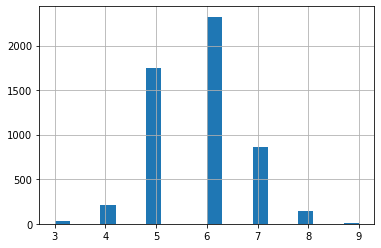

In [10]:
df['quality'].hist(bins = 20)


# Imbalanced data (TODO)
You can see from the plot above that the wine quality dataset is imbalanced.

    Since there are very few observations with quality equal to 3, 4, 8 and 9, you can drop these observations from your dataset.
    You can do this by removing data belonging to all classes except those > 4 and < 8.

In [11]:
# get data with wine quality greater than 4 and less than 8
df = df[(df['quality'] > 4) & (df['quality'] < 8)]

# reset index and drop the old one
df = df.reset_index(drop=True)

In [12]:

print(df.alcohol[0])
print(df.alcohol[100])

# EXPECTED OUTPUT
# 9.4
# 9.5

9.4
10.9


<AxesSubplot:>

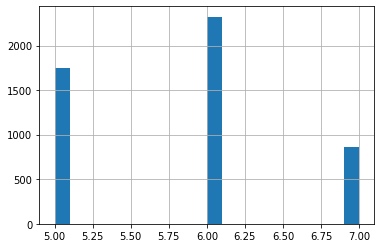

In [13]:
df['quality'].hist(bins = 20)

# Train Test Split (TODO)
Next, you can split the datasets into training, test and validation datasets.

    -The data frame should be split 80:20 into train and test sets.
    -The resulting train should then be split 80:20 into train and val sets.
    -The train_test_split parameter test_size takes a float value that ranges between 0. and 1, and represents the proportion of the dataset that is allocated to the test set. The rest of the data is allocated to the training set.


In [14]:
# split df into 80:20 train and test sets
train, test = train_test_split(df, test_size=0.2, random_state = 1)
                               
# split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [15]:
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [16]:
train_y = format_output(train)
val_y = format_output(val)
test_y = format_output(test)

In [17]:
train_y

(array([5, 6, 5, ..., 6, 5, 5]), array([1, 0, 0, ..., 1, 1, 0]))

In [18]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
1740,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8
1221,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9


Notice that after you get the labels, the train, val and test dataframes no longer contain the label columns, and contain just the feature columns.

This is because you used .pop in the format_output function.

In [19]:
def normalize(x):
    return np.array((x-train_stats['mean'])/train_stats['std'])


In [20]:
train_stats = train.describe()
train_stats = train_stats.transpose()

In [21]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


In [22]:
train_norm = normalize(train)
val_norm = normalize(val)
test_norm = normalize(test)

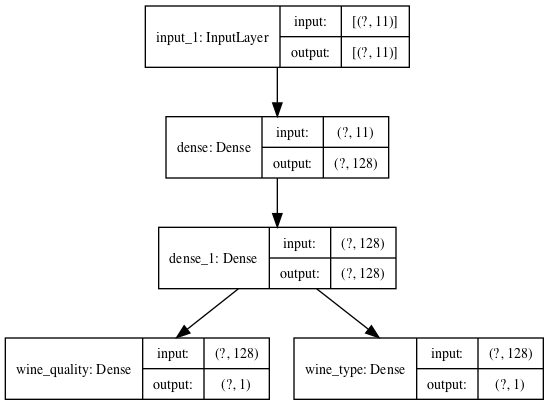

In [23]:
def base_model(inputs):
    x = Dense(128, activation='relu')(inputs)
    x = Dense(128, activation='relu')(x)
    return x


def final_model(inputs):
    x = base_model(inputs)
    wine_type = Dense(1, activation='sigmoid', name='wine_type')(x)
    win_quality = Dense(1, name='wine_quality')(x)

    model = Model(inputs=inputs, outputs=[win_quality, wine_type])
    return model


input1 = Input(shape=(11,))
model = final_model(input1)
model.compile(loss = {'wine_type': tf.losses.binary_crossentropy, 'wine_quality': 'mse'},
              optimizer= tf.optimizers.RMSprop(learning_rate=0.0001),
              metrics= {'wine_type': 'accuracy' })#, 'wine_quality': tf.metrics.RootMeanSquaredError() })



plot_model(model, show_shapes=True)


In [24]:
train_norm.shape

(3155, 11)

In [25]:
history = model.fit(train_norm, train_y, epochs=100, validation_data=(val_norm, val_y))

Train on 3155 samples, validate on 789 samples
Epoch 1/100
3155/3155 [==============================] - 2s 691us/sample - loss: 23.7639 - wine_quality_loss: 23.0626 - wine_type_loss: 0.6680 - wine_type_accuracy: 0.6206 - val_loss: 16.3557 - val_wine_quality_loss: 15.7344 - val_wine_type_loss: 0.6454 - val_wine_type_accuracy: 0.7465
Epoch 2/100
3155/3155 [==============================] - 0s 130us/sample - loss: 10.5699 - wine_quality_loss: 9.9430 - wine_type_loss: 0.6103 - wine_type_accuracy: 0.7585 - val_loss: 6.0683 - val_wine_quality_loss: 5.5423 - val_wine_type_loss: 0.5766 - val_wine_type_accuracy: 0.7376
Epoch 3/100
3155/3155 [==============================] - 0s 131us/sample - loss: 4.0381 - wine_quality_loss: 3.5101 - wine_type_loss: 0.5227 - wine_type_accuracy: 0.7559 - val_loss: 2.7288 - val_wine_quality_loss: 2.2943 - val_wine_type_loss: 0.4773 - val_wine_type_accuracy: 0.7579
Epoch 4/100
3155/3155 [==============================] - 0s 132us/sample - loss: 2.5407 - wine_qual

Epoch 30/100
3155/3155 [==============================] - 0s 146us/sample - loss: 0.4856 - wine_quality_loss: 0.4503 - wine_type_loss: 0.0358 - wine_type_accuracy: 0.9930 - val_loss: 0.4795 - val_wine_quality_loss: 0.4424 - val_wine_type_loss: 0.0352 - val_wine_type_accuracy: 0.9937
Epoch 31/100
3155/3155 [==============================] - 0s 139us/sample - loss: 0.4699 - wine_quality_loss: 0.4344 - wine_type_loss: 0.0353 - wine_type_accuracy: 0.9930 - val_loss: 0.4689 - val_wine_quality_loss: 0.4323 - val_wine_type_loss: 0.0346 - val_wine_type_accuracy: 0.9949
Epoch 32/100
3155/3155 [==============================] - 0s 139us/sample - loss: 0.4569 - wine_quality_loss: 0.4215 - wine_type_loss: 0.0349 - wine_type_accuracy: 0.9930 - val_loss: 0.4503 - val_wine_quality_loss: 0.4141 - val_wine_type_loss: 0.0344 - val_wine_type_accuracy: 0.9937
Epoch 33/100
3155/3155 [==============================] - 0s 139us/sample - loss: 0.4443 - wine_quality_loss: 0.4101 - wine_type_loss: 0.0358 - wine

Epoch 59/100
3155/3155 [==============================] - 0s 141us/sample - loss: 0.3351 - wine_quality_loss: 0.3075 - wine_type_loss: 0.0272 - wine_type_accuracy: 0.9946 - val_loss: 0.3506 - val_wine_quality_loss: 0.3194 - val_wine_type_loss: 0.0300 - val_wine_type_accuracy: 0.9937
Epoch 60/100
3155/3155 [==============================] - 0s 146us/sample - loss: 0.3332 - wine_quality_loss: 0.3063 - wine_type_loss: 0.0270 - wine_type_accuracy: 0.9949 - val_loss: 0.3585 - val_wine_quality_loss: 0.3271 - val_wine_type_loss: 0.0302 - val_wine_type_accuracy: 0.9937
Epoch 61/100
3155/3155 [==============================] - 0s 144us/sample - loss: 0.3328 - wine_quality_loss: 0.3058 - wine_type_loss: 0.0268 - wine_type_accuracy: 0.9946 - val_loss: 0.3506 - val_wine_quality_loss: 0.3194 - val_wine_type_loss: 0.0299 - val_wine_type_accuracy: 0.9937
Epoch 62/100
3155/3155 [==============================] - 0s 151us/sample - loss: 0.3310 - wine_quality_loss: 0.3034 - wine_type_loss: 0.0268 - wine

Epoch 88/100
3155/3155 [==============================] - 0s 142us/sample - loss: 0.3089 - wine_quality_loss: 0.2851 - wine_type_loss: 0.0238 - wine_type_accuracy: 0.9956 - val_loss: 0.3426 - val_wine_quality_loss: 0.3126 - val_wine_type_loss: 0.0290 - val_wine_type_accuracy: 0.9937
Epoch 89/100
3155/3155 [==============================] - 0s 142us/sample - loss: 0.3089 - wine_quality_loss: 0.2849 - wine_type_loss: 0.0236 - wine_type_accuracy: 0.9956 - val_loss: 0.3429 - val_wine_quality_loss: 0.3131 - val_wine_type_loss: 0.0289 - val_wine_type_accuracy: 0.9937
Epoch 90/100
3155/3155 [==============================] - 0s 142us/sample - loss: 0.3092 - wine_quality_loss: 0.2853 - wine_type_loss: 0.0235 - wine_type_accuracy: 0.9959 - val_loss: 0.3451 - val_wine_quality_loss: 0.3151 - val_wine_type_loss: 0.0289 - val_wine_type_accuracy: 0.9937
Epoch 91/100
3155/3155 [==============================] - 0s 142us/sample - loss: 0.3082 - wine_quality_loss: 0.2851 - wine_type_loss: 0.0234 - wine

## Metrics

In [26]:
# Gather the training metrics
loss, wine_quality_loss, wine_type_loss, wine_type_accuracy = model.evaluate(val_norm, val_y)

#print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

# EXPECTED VALUES
# ~ 0.30 - 0.38
# ~ 0.30 - 0.38
# ~ 0.018 - 0.030
# ~ 0.50 - 0.62
# ~ 0.97 - 1.0

789/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

loss: 0.33890354961950064
wine_quality_loss: 0.30945882201194763
wine_type_loss: 0.02838703617453575
wine_type_accuracy: 0.9936628937721252


## Analyze the Model Performance
Note that the model has two outputs. The output at index 0 is quality and index 1 is wine type

So, round the quality predictions to the nearest integer.

In [27]:
predictions = model.predict(test_norm)
quality_pred = predictions[0]
type_pred = predictions[1]

In [28]:
print(quality_pred[0])

# EXPECTED OUTPUT
# 5.6 - 6.0

[5.6595]


In [29]:
print(type_pred[0])
print(type_pred[944])

# EXPECTED OUTPUT
# A number close to zero
# A number close to or equal to 1

[0.00068027]
[0.9999889]



## Plot Utilities
We define a few utilities to visualize the model performance.


In [30]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)
    
    
    
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()
    
    
    
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt   

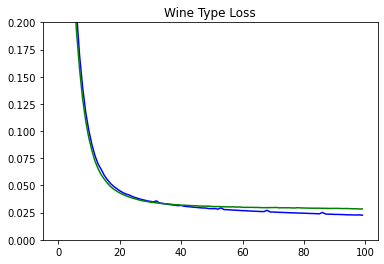

In [31]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

/opt/anaconda3/envs/py3TF2/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/opt/anaconda3/envs/py3TF2/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


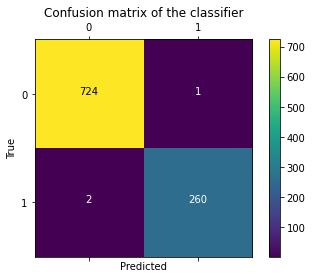

In [32]:
plot_confusion_matrix(test_y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

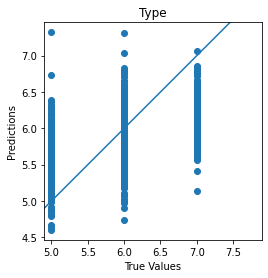

In [33]:
scatter_plot = plot_diff(test_y[0], quality_pred, title='Type')